<a href="https://colab.research.google.com/github/nucky707/-14-/blob/master/AE_Code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K
from google.colab import files
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import pandas as pd

In [ ]:
files.upload()

Saving PP_Data_Final.csv to PP_Data_Final (3).csv


In [ ]:
data_set=pd.read_csv('PP_Data_Final.csv')
print('the shape of original data is: ',np.shape(data_set))
data_set.describe()

the shape of original data is:  (38019, 41)


,Unnamed: 0,x1_Key,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,y1
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,19031.264999,30.142560,332.848734,1187.154318,7.411242,4.991162,3.443331,505.846998,694.876900,1063.176890,896.616721,3.370984,426.970225,0.048356,1.556111,-1.413167,0.159792,0.299513,0.055366,0.048370,1.304854,-1.150748,0.160761,0.048370,0.714617,-0.641102,0.148671,0.048298,0.704459,-0.628547,0.132916,6404.826291,1089.115308,3.368008,238.035878,704.706220,66.823897,0.883637,-39.731917,0.101291
std,10983.411796,28.180275,126.761512,201.878894,1.994714,2.465635,1.049146,97.685710,34.672077,19.441421,21.121161,1.285164,120.276249,0.004049,2.971936,2.337315,0.112338,0.352669,0.010079,0.006118,2.871974,2.200954,0.147024,0.005567,0.642923,0.716611,0.136511,0.004874,0.834398,0.804778,0.109273,1299.703877,224.027236,1.284999,45.318485,56.610248,26.319796,26.738308,31.386193,0.301718
min,0.000000,0.000000,150.000000,656.000000,2.000000,1.000000,1.000000,150.000000,329.233800,988.634600,805.523500,1.516500,-10.000000,0.029600,0.091600,-50.000000,0.046400,0.051000,0.031200,-0.004300,0.080900,-50.000000,0.012200,0.022200,0.088700,-39.039000,0.015000,-0.069300,0.084700,-34.211700,0.015600,3192.899900,400.463000,1.477500,63.800800,272.066700,8.317100,-75.000000,-155.990000,0.000000
25%,9527.500000,4.000000,262.000000,1041.000000,6.000000,3.000000,3.000000,447.000000,700.000000,1049.090150,885.899800,2.650800,338.000000,0.046900,0.099200,-1.713600,0.051500,0.054900,0.048300,0.046300,0.096100,-1.137400,0.020700,0.046800,0.096100,-1.110250,0.020600,0.046400,0.096100,-1.013650,0.020600,5415.603250,922.224500,2.621700,209.259150,714.884600,43.558200,-19.000000,-59.645000,0.000000
50%,19035.000000,23.000000,305.000000,1210.000000,7.000000,5.000000,4.000000,513.000000,700.000000,1061.700600,899.893600,3.086600,408.000000,0.047900,1.095600,-0.997900,0.135200,0.244600,0.049900,0.047500,0.784300,-0.689700,0.150600,0.047800,0.631200,-0.553000,0.116100,0.047600,0.668300,-0.593600,0.124000,6312.222200,1071.392800,3.096600,251.846100,719.600000,63.870000,0.000000,-33.150000,0.000000
75%,28541.500000,47.000000,381.000000,1306.000000,9.000000,7.000000,4.000000,584.000000,700.000000,1075.241950,909.928000,3.853400,511.000000,0.049800,1.756300,-0.004600,0.241100,0.423450,0.062300,0.050600,1.216100,-0.001500,0.257100,0.049900,1.169500,-0.001900,0.245500,0.050300,1.086400,-0.001500,0.219800,7260.074950,1235.925150,3.842100,276.060800,722.114700,84.736050,19.000000,-13.660000,0.000000
max,38048.000000,130.000000,1275.000000,1613.000000,16.000000,10.000000,5.000000,650.000000,700.000000,1132.950000,955.101000,12.996500,1299.000000,0.402700,49.998500,0.027500,0.807200,18.252200,0.203000,0.119300,49.998500,0.064100,1.658500,0.575500,24.495400,0.040800,3.446800,0.107300,49.998500,0.032000,2.191000,12171.095700,2044.645900,13.000000,290.612200,724.064900,121.523600,75.000000,0.780000,1.000000


In [ ]:
#split data to three classes:
#set y1_type TAIL to y1 value 1
#set y1_type LEAD to y1 value 2
data_set['y1_type']=data_set['y1_type'].astype(str)
data_class_1=data_set.loc[data_set['y1_type']=='NONE']
data_class_2=data_set.loc[data_set['y1_type']=='TAIL']
data_class_3=data_set.loc[data_set['y1_type']=='LEAD']
data_class_1.describe()

,Unnamed: 0,x1_Key,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,y1
count,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34168.0
mean,17104.893204,30.246898,340.786818,1197.989844,7.576387,5.047091,3.499239,499.859957,694.316127,1062.655901,897.828048,3.451513,428.451095,0.048322,1.303398,-1.186686,0.153047,0.264825,0.055081,0.048338,1.075463,-0.946636,0.147538,0.048331,0.686703,-0.615729,0.142133,0.048292,0.655563,-0.579654,0.123948,6481.682850,1088.369035,3.448169,235.316891,703.047356,66.849438,0.765629,-38.199529,0.0
std,9871.978759,28.191890,128.888184,199.705055,1.930060,2.489967,1.033266,97.617435,36.464203,19.540985,20.149346,1.306859,123.233377,0.004128,2.406019,1.915259,0.105199,0.309963,0.009641,0.005682,2.334469,1.793905,0.132443,0.005746,0.625073,0.710933,0.130518,0.004274,0.639778,0.623313,0.098224,1287.491128,218.530935,1.307086,45.953548,59.268217,26.104055,26.371324,30.734323,0.0
min,0.000000,0.000000,150.000000,656.000000,2.000000,1.000000,1.000000,150.000000,329.233800,988.634600,805.523500,1.516500,-1.000000,0.036000,0.091600,-50.000000,0.046400,0.051000,0.031200,-0.002100,0.080900,-32.423400,0.012200,0.032500,0.088700,-39.039000,0.015100,0.009100,0.084700,-16.780100,0.019200,3192.899900,400.463000,1.477500,63.800800,272.066700,10.202100,-75.000000,-155.990000,0.0
25%,8564.750000,4.000000,269.000000,1060.000000,7.000000,3.000000,3.000000,432.000000,700.000000,1048.766400,887.842875,2.751000,341.000000,0.046800,0.099200,-1.586900,0.051400,0.054700,0.048200,0.046300,0.094600,-1.057400,0.020600,0.046800,0.095600,-1.092300,0.020600,0.046500,0.094600,-0.996400,0.020600,5512.274875,927.379825,2.753875,206.736925,714.640450,44.059300,-19.000000,-57.220000,0.0
50%,17108.500000,23.000000,310.000000,1225.000000,7.000000,5.000000,4.000000,513.000000,700.000000,1060.571800,900.114000,3.151000,408.000000,0.047700,0.972000,-0.878900,0.130900,0.219250,0.049700,0.047500,0.701900,-0.610400,0.139600,0.047600,0.626750,-0.552200,0.114400,0.047500,0.653100,-0.575300,0.115200,6395.512950,1073.951750,3.145450,247.218050,719.140000,63.832500,0.000000,-31.490000,0.0
75%,25653.250000,47.000000,381.000000,1321.000000,9.000000,7.000000,4.000000,584.000000,700.000000,1074.263025,910.640500,3.853700,511.000000,0.049700,1.643400,-0.004600,0.235200,0.397500,0.062200,0.050400,1.134000,-0.001500,0.247200,0.049800,1.150625,-0.001500,0.239200,0.050100,1.065100,-0.001500,0.216000,7315.436525,1232.704675,3.856500,275.221500,722.000000,84.292500,19.000000,-12.830000,0.0
max,34197.000000,127.000000,1275.000000,1613.000000,16.000000,10.000000,5.000000,650.000000,700.000000,1132.950000,955.101000,12.996500,1299.000000,0.402700,49.998500,0.015300,0.791300,18.252200,0.203000,0.113100,49.998500,0.022900,1.658500,0.575500,24.495400,0.018600,3.446800,0.080700,31.292700,0.016800,1.064300,12171.095700,2026.813700,13.000000,288.343300,723.929600,121.523600,75.000000,0.780000,0.0


In [ ]:
#keep un-numerical columns and labels for three classes:
#drop column y1_type, y1, RecordId
data_class_1=data_class_1.drop(['y1_type','y1','Unnamed: 0'],axis=1)
data_class_2=data_class_2.drop(['y1_type','y1','Unnamed: 0'],axis=1)
data_class_3=data_class_3.drop(['y1_type','y1','Unnamed: 0'],axis=1)
print('the shape of class 1 data is: ',np.shape(data_class_1))
print('the shape of class 2 data is: ',np.shape(data_class_2))
print('the shape of class 3 data is: ',np.shape(data_class_3))

the shape of class 1 data is:  (34168, 38)
the shape of class 2 data is:  (646, 38)
the shape of class 3 data is:  (3203, 38)


In [ ]:
#change data type to numpy
data_class_1=pd.DataFrame.to_numpy(data_class_1,dtype=np.float64)
data_class_2=pd.DataFrame.to_numpy(data_class_2,dtype=np.float64)
data_class_3=pd.DataFrame.to_numpy(data_class_3,dtype=np.float64)
print('the shape of class 1 data is: ',np.shape(data_class_1))
print('the shape of class 2 data is: ',np.shape(data_class_2))
print('the shape of class 3 data is: ',np.shape(data_class_3))

the shape of class 1 data is:  (34168, 38)
the shape of class 2 data is:  (646, 38)
the shape of class 3 data is:  (3203, 38)


In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_class_1)
data_class_1=scaler.transform(data_class_1)
data_class_2=scaler.transform(data_class_2)
data_class_3=scaler.transform(data_class_3)
print(np.shape(data_class_1))

(34168, 38)


# Using tensor board to show error change

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard
print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.2.0-rc2


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Searching for best encoded dimension value:

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 39/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.6669
Epoch 40/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.6656
Epoch 41/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.6673
Epoch 42/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.6699
Epoch 43/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.6720
Epoch 44/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.6729
Epoch 45/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.6724
Epoch 46/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.6733
Epoch 47/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.6735
Epoch 48/100
134/134 [==============================] -

ValueError: ignored

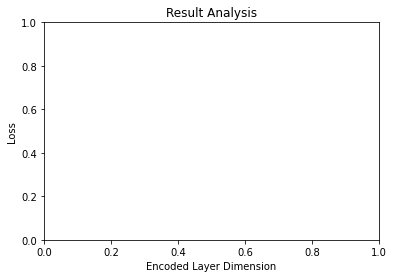

In [ ]:
#creating encoding dimension search:

list_dim=[]

list_loss_class1=[]
list_loss_class2=[]
list_loss_class3=[]

list_acc_class1=[]
list_acc_class2=[]
list_acc_class3=[]

for dim in range(20,25):
  dim+=1
  list_dim.append(dim)
  input_dim=data_class_1.shape[1]
  encoding_dim=dim
  input_img=tf.keras.Input((input_dim,))
  encoded=tf.keras.layers.Dense(encoding_dim,activation='relu')(input_img)
  decoded=tf.keras.layers.Dense(input_dim,activation='relu')(encoded)
  autoencoder_with_mse=tf.keras.Model(input_img,decoded)
  autoencoder_with_mse.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
  autoencoder_with_mse.fit(data_class_1,data_class_1,epochs=100,callbacks=[tensorboard_callback],batch_size=256)
  test_loss_1,test_acc_1 = autoencoder_with_mse.evaluate(data_class_1,data_class_1)
  test_loss_2,test_acc_2 = autoencoder_with_mse.evaluate(data_class_2,data_class_2)
  test_loss_3,test_acc_3 = autoencoder_with_mse.evaluate(data_class_3,data_class_3)
  list_loss_class1.append(test_loss_1)
  list_loss_class2.append(test_loss_2)
  list_loss_class3.append(test_loss_3)
  list_acc_class1.append(test_acc_1)
  list_acc_class2.append(test_acc_2)
  list_acc_class3.append(test_acc_3)

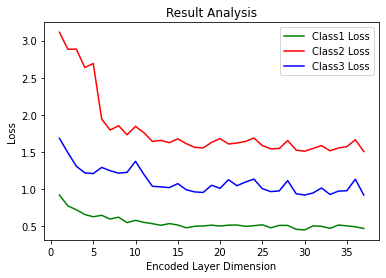

In [ ]:
plt.figure()
plt.title('Result Analysis')
plt.xlabel('Encoded Layer Dimension')
plt.ylabel('Loss')
plt.plot(list_dim, list_loss_class1,color='green', label='Class1 Loss')
plt.plot(list_dim, list_loss_class2,color='red', label='Class2 Loss')
plt.plot(list_dim, list_loss_class3,color='blue', label='Class3 Loss')
plt.legend()

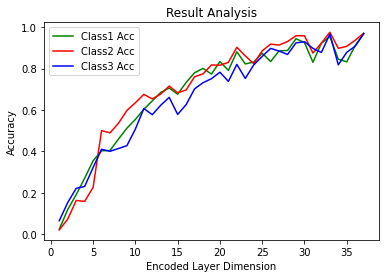

In [ ]:
plt.figure()
plt.title('Result Analysis')
plt.xlabel('Encoded Layer Dimension')
plt.ylabel('Accuracy')
plt.plot(list_dim, list_acc_class1,color='green', label='Class1 Acc')
plt.plot(list_dim, list_acc_class2,color='red', label='Class2 Acc')
plt.plot(list_dim, list_acc_class3,color='blue', label='Class3 Acc')
plt.legend()

In [ ]:
print(list_loss_class1)
print(list_loss_class2)
print(list_loss_class3)

[0.9208934307098389, 0.7739796042442322, 0.721983015537262, 0.6585485339164734, 0.6276589035987854, 0.6476930975914001, 0.5970867276191711, 0.621955156326294, 0.5486512780189514, 0.5796071887016296, 0.5522764325141907, 0.5348604917526245, 0.5126450061798096, 0.5360223054885864, 0.5169185400009155, 0.47890380024909973, 0.49999943375587463, 0.5040599703788757, 0.5144334435462952, 0.5031737685203552, 0.5148451924324036, 0.5165938138961792, 0.49860265851020813, 0.5071496367454529, 0.5197134017944336, 0.4791663885116577, 0.5119447708129883, 0.5110535621643066, 0.45918017625808716, 0.45071548223495483, 0.5052590370178223, 0.4990653991699219, 0.47191908955574036, 0.5165800452232361, 0.5049164295196533, 0.4927369952201843, 0.4694778621196747]
[3.112150192260742, 2.8826584815979004, 2.8849613666534424, 2.6372005939483643, 2.6914379596710205, 1.9433811902999878, 1.7960361242294312, 1.8540232181549072, 1.7319637537002563, 1.8443766832351685, 1.7593765258789062, 1.6416348218917847, 1.6567842960357

In [ ]:
print(list_acc_class1)
print(list_acc_class2)
print(list_acc_class3)

[0.02379419282078743, 0.11876609921455383, 0.19052915275096893, 0.2699894607067108, 0.3542788624763489, 0.4024818539619446, 0.40388667583465576, 0.45905524492263794, 0.5118239521980286, 0.5540564060211182, 0.6028155088424683, 0.6437309980392456, 0.6846756935119629, 0.7054554224014282, 0.6757492423057556, 0.7326445579528809, 0.779559850692749, 0.8005443811416626, 0.7731503248214722, 0.8335869908332825, 0.7908569574356079, 0.880794882774353, 0.8221728205680847, 0.8313626646995544, 0.8737707734107971, 0.8336747884750366, 0.885272741317749, 0.8870580792427063, 0.9438363313674927, 0.925398051738739, 0.8301041722297668, 0.9221786260604858, 0.9545188546180725, 0.845235288143158, 0.8321821689605713, 0.9109107851982117, 0.9671329855918884]
[0.020123839378356934, 0.07275541871786118, 0.16253869235515594, 0.15789473056793213, 0.22600619494915009, 0.5, 0.4891640841960907, 0.5356037020683289, 0.5975232124328613, 0.6346749067306519, 0.6749225854873657, 0.6532507538795471, 0.6764705777168274, 0.71517

# Searching for best encoded dimension value:(20-25)

In [ ]:
list_dim_new=[]

list_loss_class1_new=[]
list_loss_class2_new=[]
list_loss_class3_new=[]

list_acc_class1_new=[]
list_acc_class2_new=[]
list_acc_class3_new=[]

for dim in range(20,25):
  dim+=1
  list_dim_new.append(dim)
  input_dim=data_class_1.shape[1]
  encoding_dim=dim
  input_img=tf.keras.Input((input_dim,))
  encoded=tf.keras.layers.Dense(encoding_dim,activation='relu')(input_img)
  decoded=tf.keras.layers.Dense(input_dim,activation='relu')(encoded)
  autoencoder_with_mse=tf.keras.Model(input_img,decoded)
  autoencoder_with_mse.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
  autoencoder_with_mse.fit(data_class_1,data_class_1,epochs=100,callbacks=[tensorboard_callback],batch_size=256)
  test_loss_1,test_acc_1 = autoencoder_with_mse.evaluate(data_class_1,data_class_1)
  test_loss_2,test_acc_2 = autoencoder_with_mse.evaluate(data_class_2,data_class_2)
  test_loss_3,test_acc_3 = autoencoder_with_mse.evaluate(data_class_3,data_class_3)
  list_loss_class1_new.append(test_loss_1)
  list_loss_class2_new.append(test_loss_2)
  list_loss_class3_new.append(test_loss_3)
  list_acc_class1_new.append(test_acc_1)
  list_acc_class2_new.append(test_acc_2)
  list_acc_class3_new.append(test_acc_3)

Epoch 1/100
134/134 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.0854
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.2307
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.3351
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.4040
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.4446
Epoch 6/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.4780
Epoch 7/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.5186
Epoch 8/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.5600
Epoch 9/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.5961
Epoch 10/100
134/134 [==============================] - 0s 2ms/step - loss: 0.4961 - accura

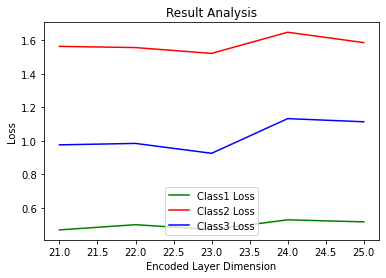

In [ ]:
plt.figure()
plt.title('Result Analysis')
plt.xlabel('Encoded Layer Dimension')
plt.ylabel('Loss')
plt.plot(list_dim_new, list_loss_class1_new,color='green', label='Class1 Loss')
plt.plot(list_dim_new, list_loss_class2_new,color='red', label='Class2 Loss')
plt.plot(list_dim_new, list_loss_class3_new,color='blue', label='Class3 Loss')
plt.legend()

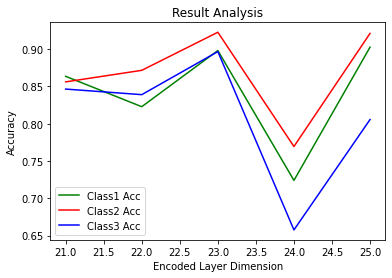

In [ ]:
plt.figure()
plt.title('Result Analysis')
plt.xlabel('Encoded Layer Dimension')
plt.ylabel('Accuracy')
plt.plot(list_dim_new, list_acc_class1_new,color='green', label='Class1 Acc')
plt.plot(list_dim_new, list_acc_class2_new,color='red', label='Class2 Acc')
plt.plot(list_dim_new, list_acc_class3_new,color='blue', label='Class3 Acc')
plt.legend()

#Building Model

In [ ]:
#creat autoencoder_with_mse function

input_dim=data_class_1.shape[1]

#using 19 for encoding dimension:
encoding_dim=30

#define input placeholder:
input_img=tf.keras.Input((input_dim,))

#define encoder:
encoded=tf.keras.layers.Dense(encoding_dim,activation='relu')(input_img)

#define decoder:
decoded=tf.keras.layers.Dense(input_dim,activation='relu')(encoded)

#define autoencoder:
autoencoder_with_mse=tf.keras.Model(input_img,decoded)

In [ ]:
#plot model architecture:
autoencoder_with_mse.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 38)]              0         
_________________________________________________________________
dense_36 (Dense)             (None, 30)                1170      
_________________________________________________________________
dense_37 (Dense)             (None, 38)                1178      
Total params: 2,348
Trainable params: 2,348
Non-trainable params: 0
_________________________________________________________________


# Train the model using aotuencoder and the TensorBoard callback

In [ ]:
#compile and training model
#def autoencoder_with_mse():
autoencoder_with_mse.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

autoencoder_with_mse.fit(data_class_1,data_class_1,epochs=100,callbacks=[tensorboard_callback],batch_size=256)

#evaluating the model with accuracy of class2 and class3 data:
test_loss_1,test_acc_1 = autoencoder_with_mse.evaluate(data_class_2,data_class_2)
test_loss_2,test_acc_2 = autoencoder_with_mse.evaluate(data_class_3,data_class_3)

Epoch 1/100
134/134 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.1111
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.2809
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.4346
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.5119
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.5606
Epoch 6/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.5909
Epoch 7/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.6148
Epoch 8/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.6355
Epoch 9/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.6572
Epoch 10/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5268 - accura

In [ ]:
#testing for class2 data using MSE:
autoencoder_with_mse.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

autoencoder_with_mse.fit(data_class_2,data_class_2,epochs=100,callbacks=[tensorboard_callback],batch_size=256)

Epoch 1/100
3/3 [==============================] - 0s 15ms/step - loss: 1.7533 - accuracy: 0.8963
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7543 - accuracy: 0.8994
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7679 - accuracy: 0.8978
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6561 - accuracy: 0.8885
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7044 - accuracy: 0.8947
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 1.6851 - accuracy: 0.9040
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7575 - accuracy: 0.9040
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7934 - accuracy: 0.9056
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7606 - accuracy: 0.9071
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6696 - accuracy: 0.9071
Epoch 11/100
3/3 [==========

In [ ]:
#class 3:
autoencoder_with_mse.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

autoencoder_with_mse.fit(data_class_3,data_class_3,epochs=100,callbacks=[tensorboard_callback],batch_size=256)

Epoch 1/100
13/13 [==============================] - 0s 4ms/step - loss: 1.2823 - accuracy: 0.7434
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1.3245 - accuracy: 0.7524
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2917 - accuracy: 0.7540
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2925 - accuracy: 0.7593
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2959 - accuracy: 0.7552
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2879 - accuracy: 0.7568
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2930 - accuracy: 0.7568
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 1.3003 - accuracy: 0.7593
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2829 - accuracy: 0.7599
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 1.2854 - accuracy: 0.7599
Epoch 11/

In [ ]:
%tensorboard --logdir logs

# Plot only for 6 different encoded dimension results:


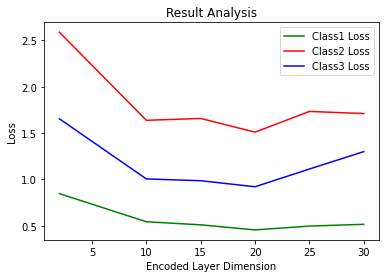

In [ ]:
#ploting the tuning result:

from matplotlib import pyplot
import matplotlib.pyplot as plt

list_num=[2,10,15,20,25,30]

list_loss_class1=[0.8462,0.5424,0.5093,0.4544,0.496,0.5149]
list_loss_class2=[2.589,1.638,1.658,1.51,1.734,1.711]
list_loss_class3=[1.654,1.005,0.9856,0.9206,1.112,1.3]

list_acc_class1=[0.1434,0.5737,0.7242,0.8382,0.8616,0.8622]
list_acc_class2=[0.2876,0.6625,0.7477,0.8959,0.929,0.918]
list_acc_class3=[0.2182,0.6372,0.7602,0.8738,0.8819,0.7637]


plt.figure()
plt.title('Result Analysis')
plt.xlabel('Encoded Layer Dimension')
plt.ylabel('Loss')
plt.plot(list_num, list_loss_class1,color='green', label='Class1 Loss')
plt.plot(list_num, list_loss_class2,color='red', label='Class2 Loss')
plt.plot(list_num, list_loss_class3,color='blue', label='Class3 Loss')
plt.legend()

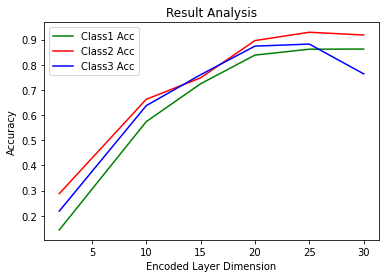

In [ ]:
plt.figure()
plt.title('Result Analysis')
plt.xlabel('Encoded Layer Dimension')
plt.ylabel('Accuracy')
plt.plot(list_num, list_acc_class1,color='green', label='Class1 Acc')
plt.plot(list_num, list_acc_class2,color='red', label='Class2 Acc')
plt.plot(list_num, list_acc_class3,color='blue', label='Class3 Acc')
plt.legend()